In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Data input and cleaning

In [2]:
sns.set()
data = pd.read_csv("data.csv", dtype={'time':np.float64})

data['error'] = [float(x[1:-1]) for x in data['fbest']]

data = data.join(data['freq'].str.split(', ', expand=True).apply(pd.to_numeric))

data.drop(["fbest", "freq", "Unnamed: 0"], axis=1, inplace=True)
    
data.rename(columns=lambda x: x+1 if type(x)==int else x, inplace=True)

data

,cluster,currenttime,f1,fhistory,grad,sol,error,1,2,3,4,5,6
0,0,"[array([180.71170759]), array([275.43360448]),...",75,"[array([57.3006165]), array([23.00211603]), ar...",150,"[2.481711619965975, 2.8156555823009155, 3.8522...",7.680927,74.841908,214.516186,394.824281,524.304069,654.735465,820.759434
1,1,[9.23193645477295],75,[[95.13896007287445]],150,"[8.837097035044998, 8.837097035044998, 8.83709...",95.138960,54.752770,261.158277,340.318786,486.013126,943.619712,1481.899188
2,2,[9.23209023475647],75,[[85.11760401418549]],150,"[7.745494362038163, 7.745494362038163, 10.0436...",85.117604,101.968052,196.464578,499.257134,712.073160,998.613882,1101.721168
3,3,[9.264617681503296],75,[[39.34472518422288]],150,"[7.017005833609394, 8.960769575830996, 11.0150...",39.344725,63.013721,218.707095,367.196116,456.660491,888.387011,912.161953
4,4,[9.283731937408447],75,[[35.10486232459829]],150,"[7.577604820142181, 8.999759236809137, 11.0150...",35.104862,66.485061,225.529406,382.359077,485.945132,878.798775,920.010426
5,5,[9.272595643997192],75,[[34.164691765002765]],150,"[7.491408886409889, 8.582601997234775, 11.0150...",34.164692,72.224506,207.581431,391.931901,529.770604,867.083229,958.690379
6,6,[9.259601593017578],75,[[34.330013810337924]],150,"[7.491408886409889, 8.546831743309811, 11.1127...",34.330014,64.972713,199.133428,380.070502,508.142130,830.282676,974.020450
7,7,[9.278992176055908],75,[[30.57718024731238]],150,"[7.260076597935442, 8.587482341869986, 11.1127...",30.577180,70.330207,204.658096,391.953389,531.972868,837.308544,945.704109
8,8,[9.286754131317139],75,[[12.69628871998645]],150,"[7.260076597935442, 8.587482341869986, 11.1127...",12.696289,70.346107,204.058610,390.123634,512.440857,649.673324,824.981916
9,9,[9.256656408309937],75,[[12.427578602446651]],150,"[7.260076597935442, 8.446271759198922, 11.1127...",12.427579,72.581023,203.041603,378.166948,503.744126,653.639101,786.587944


In [3]:
data_clean = pd.concat([data["cluster"], data["error"]], axis=1)
data_clean = data_clean.iloc[1:-1]
data_clean

,cluster,error
1,1,95.138960
2,2,85.117604
3,3,39.344725
4,4,35.104862
5,5,34.164692
6,6,34.330014
7,7,30.577180
8,8,12.696289
9,9,12.427579
10,10,12.278619


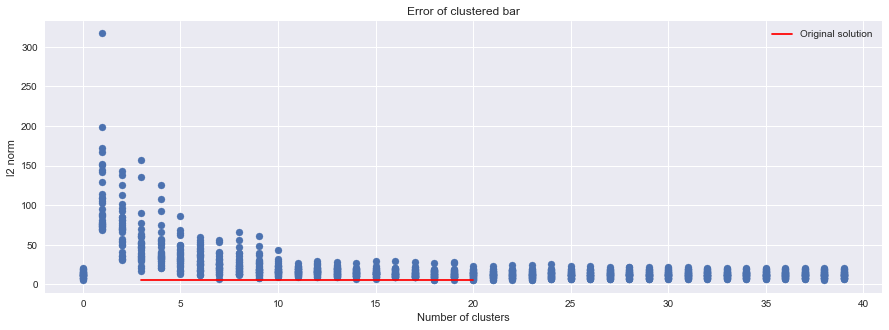

In [4]:
fig = plt.figure(figsize=(15, 5))
plt.scatter(x=[float(x) for x in data_clean["cluster"]], y=data_clean["error"])
plt.title("Error of clustered bar")
plt.ylabel("l2 norm")
plt.xlabel("Number of clusters")
plt.plot(range(3,21), [5.282644]*18, c="red")
plt.legend(["Original solution"])
plt.show()


In [5]:
data_clean = pd.concat([data["cluster"], data["error"]], axis=1)
data_clean["relative_error"] = 0

for index, row in data_clean.iterrows():
    if row["cluster"] == 0:
        baseline = row["error"]
        data_clean.iloc[index, 2] = 1
    else:
        data_clean.iloc[index, 2] = row["error"]/baseline

data_clean.head()

,cluster,error,relative_error
0,0,7.680927,1.000000
1,1,95.138960,12.386391
2,2,85.117604,11.081684
3,3,39.344725,5.122393
4,4,35.104862,4.570394


### Log_10(E/p) for each solution

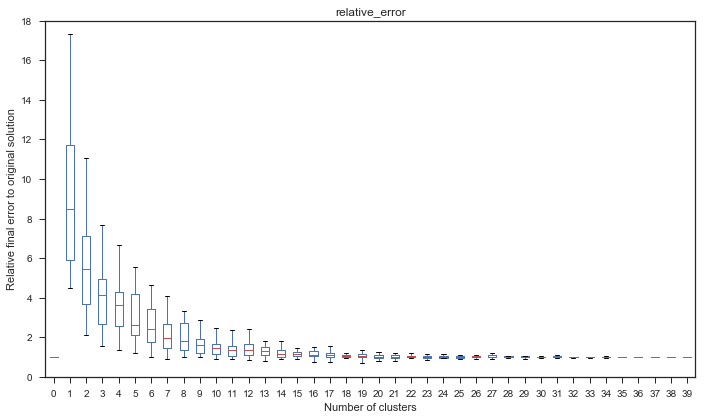

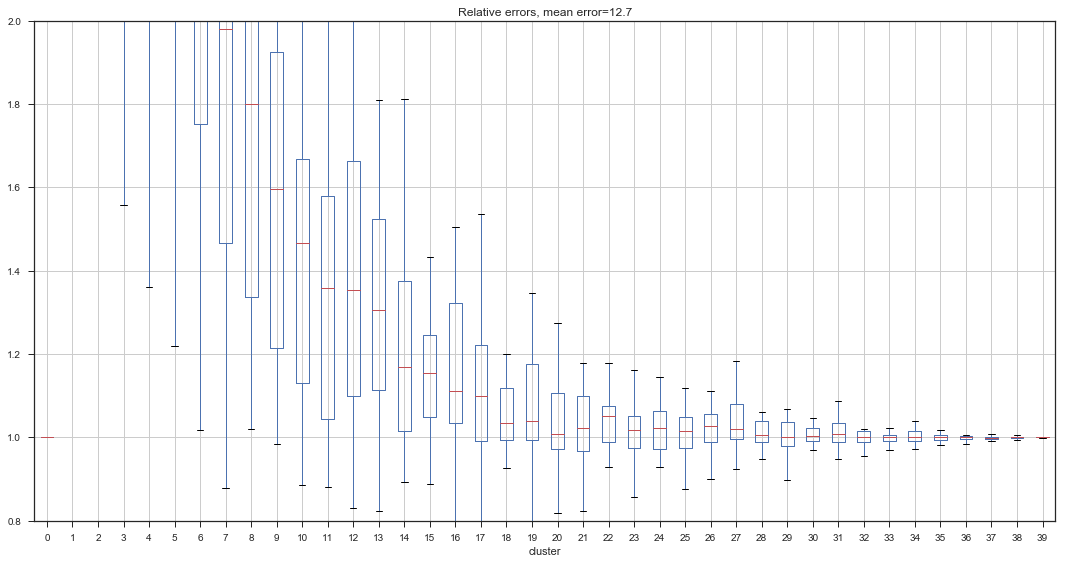

In [11]:
fig = plt.figure(figsize=(10, 6))
sns.set_style("ticks")

test = data_clean.drop(["error"], axis=1)
mean = data_clean[(data_clean["cluster"] == 0)]["error"].mean()
test.boxplot(column="relative_error", by="cluster", figsize=(10, 6), grid=False)
#plt.title("Relative errors, mean error={:.1f}".format(mean))
plt.suptitle("")
plt.ylim([0, 18])
plt.xlabel("Number of clusters")
plt.ylabel("Relative final error to original solution")
    
plt.tight_layout()
plt.savefig("clustering.pgf")
plt.show()

test.boxplot(column="relative_error", by="cluster", figsize=(15, 8))
plt.title("Relative errors, mean error={:.1f}".format(mean))
plt.suptitle("")
plt.ylim([0.8, 2])
    
plt.tight_layout()
plt.show()